In [85]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

from tqdm import tqdm
import xarray as xr
import numpy as np
import os

store = new_data_store("s3", root="deep-esdl-output")

In [86]:
list(store.get_data_ids())

['black-sea-1x1024x1024.levels',
 'black-sea-1x1024x1024.zarr',
 'black-sea-256x128x128.zarr',
 'esdc-8d-0.25deg-1x720x1440-3.0.0.zarr',
 'esdc-8d-0.25deg-1x720x1440-3.0.1.zarr',
 'esdc-8d-0.25deg-1x720x512-3.0.0.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.0.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr',
 'polar-100m-1x2048x2048-v1.0.0.zarr']

In [87]:
da = store.open_data('polar-100m-1x2048x2048-v1.0.0.zarr')

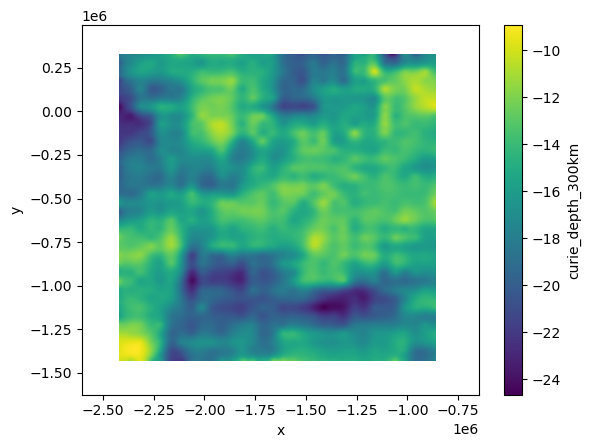

In [84]:
da.curie_depth_300km.plot.imshow()

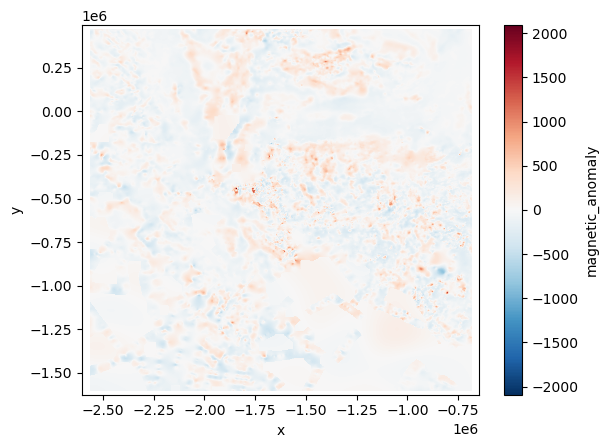

In [81]:
da.magnetic_anomaly.plot.imshow()

In [25]:
datasets = [
    'curie_depth_200km_100m.zarr',
    'curie_depth_300km_100m.zarr',
    'geothermal_heat_flow_200km_100m.zarr',
    'geothermal_heat_flow_300km_100m.zarr',
    'geothermal_heat_flow_uncertainty_200km_100m.zarr',
    'geothermal_heat_flow_uncertainty_300km_100m.zarr',
    'ice_thickness_100m.zarr',
    'magnetic_anomaly_100m.zarr',
    'thwaites_sublacial_lakes_2013_2017_100m.zarr'
]

In [26]:
das = [store.open_data(dataset) for dataset in datasets]

In [72]:
def remove_spatial_ref(da):

    if ("spatial_ref" in list(da.coords)) or ("spatial_ref" in list(da.variables)):
        da = da.drop("spatial_ref")
    
    return da

In [73]:
das = [remove_spatial_ref(da) for da in das]

In [75]:
das = xr.merge(das)

In [76]:
store_output.write_data(
    das, 'polar-100m-1x2048x2048-v1.0.0.zarr', replace=True
)

<xarray.Dataset>
Dimensions:                                 (y: 21210, x: 19530, time: 2)
Coordinates:
  * x                                       (x) float64 -2.602e+06 ... -6.496...
  * y                                       (y) float64 -1.626e+06 ... 4.95e+05
  * time                                    (time) datetime64[ns] 2013-01-01 ...
Data variables:
    curie_depth_200km                       (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    curie_depth_300km                       (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_200km              (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_300km              (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_uncertainty_200km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_uncertainty_300km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    mrg                                     (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    magnetic_anomaly                        (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    Thw_124                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    Thw_142                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    Thw_170                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    Thw_70                                  (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>

In [24]:
store.open_data('curie_depth_200km_100m.zarr')

<xarray.Dataset>
Dimensions:            (y: 21210, x: 19530)
Coordinates:
  * x                  (x) float64 -2.602e+06 -2.602e+06 ... -6.496e+05
  * y                  (y) float64 -1.626e+06 -1.626e+06 ... 4.948e+05 4.95e+05
Data variables:
    curie_depth_200km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [20]:
def upload_cube(cube):
    filename = cube.split("/")[-1]
    da = xr.open_zarr(cube)
    store_output.write_data(da, filename, replace=True)

In [16]:
[upload_cube(cube) for cube in tqdm(cubes)]

<xarray.Dataset>
Dimensions:      (y: 21210, x: 19530)
Coordinates:
  * x            (x) float64 -2.602e+06 -2.602e+06 ... -6.496e+05 -6.496e+05
  * y            (y) float64 -1.626e+06 -1.626e+06 ... 4.948e+05 4.95e+05
Data variables:
    mrg          (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    spatial_ref  int64 ...

In [2]:
pathOut = "~/data/polar/cubes/repeat_subglacial_lake_drainage_and_filling_thwaites_glacier"
pathOut = os.path.expanduser(pathOut)

filepath = f"{pathOut}/thwaites_sublacial_lakes_2013_2017_100m.zarr"

da = xr.open_zarr(filepath)

store_output.write_data(
    datacube, 'esdc-8d-0.25deg-256x128x128-3.0.0.zarr', replace=True
)

In [11]:
size = 300

pathOut = f"~/data/polar/cubes/curie_depth_estimates_{size}x{size}km_xyz_data"
pathOut = os.path.expanduser(pathOut)

filepath = f"{pathOut}/curie_depth_{size}km_100m.zarr"

da = xr.open_zarr(filepath)

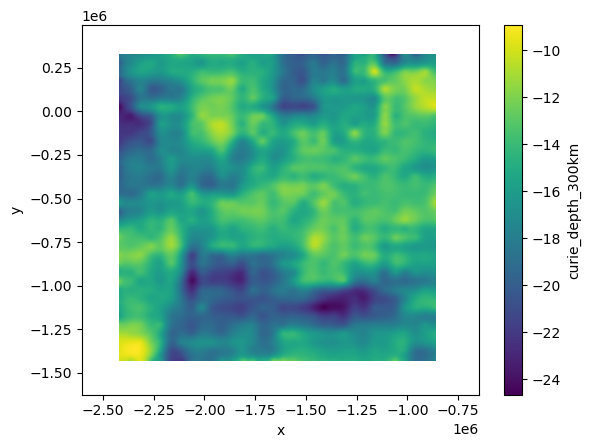

In [13]:
da.curie_depth_300km.plot.imshow()

In [2]:
pathOut = f"~/data/polar/cubes/bedrock_topography_and_geothermal_heat_flux_antarctica_goce"
pathOut = os.path.expanduser(pathOut)

if not os.path.exists(pathOut):
    os.makedirs(pathOut)

In [3]:
filepath = f"{pathOut}/ice_thickness_100m.zarr"

In [4]:
da = xr.open_zarr(filepath)

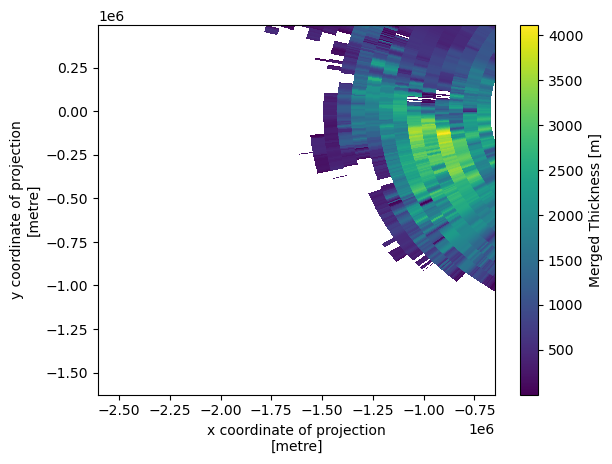

In [5]:
da.mrg.plot.imshow()

In [10]:
import json

with open('../cube.geojson', 'r') as f:
    cube_specs = json.load(f)

In [11]:
bbox = cube_specs['properties']['spatial_bbox']
step = cube_specs['properties']['spatial_res']

x = np.arange(bbox[0],bbox[2],step[0]) + step[0]/2
y = np.arange(bbox[1],bbox[3],step[1]) + step[1]/2

In [12]:
ref_spatial = dict(x=x,y=y)

In [18]:
da = xr.open_zarr(filepath)

In [19]:
da

<xarray.Dataset>
Dimensions:      (y: 3476, x: 3476)
Coordinates:
  * x            (x) float64 -3.337e+06 -3.335e+06 ... 3.336e+06 3.338e+06
  * y            (y) float64 3.337e+06 3.335e+06 ... -3.336e+06 -3.338e+06
Data variables:
    mrg          (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    spatial_ref  int64 ...

In [26]:
filepath.split("/")[-1].replace(".zarr","_100m.zarr")

'ice_thickness_100m.zarr'

In [21]:
da = da.interp(ref_spatial,method="linear")

In [22]:
da.chunk(dict(x=2048,y=2048))

<xarray.Dataset>
Dimensions:      (y: 21210, x: 19530)
Coordinates:
  * x            (x) float64 -2.602e+06 -2.602e+06 ... -6.496e+05 -6.496e+05
  * y            (y) float64 -1.626e+06 -1.626e+06 ... 4.948e+05 4.95e+05
Data variables:
    mrg          (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    spatial_ref  int64 ...

In [6]:
da = xr.DataArray(
    data=np.nan,
    dims=["y", "x"],
    coords=dict(
        x=(["x"], x),
        y=(["y"], y),
    ),
)

In [8]:
da.chunk(dict(x=2048,y=2048))

<xarray.DataArray (y: 21210, x: 19530)>
dask.array<xarray-<this-array>, shape=(21210, 19530), dtype=float64, chunksize=(2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -2.602e+06 -2.602e+06 ... -6.496e+05 -6.496e+05
  * y        (y) float64 -1.626e+06 -1.626e+06 -1.626e+06 ... 4.948e+05 4.95e+05

In [ ]:
cube_specs['properties']['spatial_bbox']

In [16]:
cubes = glob(os.path.expanduser("~/data/polar/cubes/*"))
cubes.sort()
cubes = [glob(f"{cube}/*.zarr")[0] for cube in cubes]

In [36]:
xr.open_zarr(cubes[-1])

<xarray.Dataset>
Dimensions:      (time: 2, y: 835, x: 1401)
Coordinates:
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2013-01-01 2017-01-01
  * x            (x) float64 -1.82e+06 -1.819e+06 ... -1.12e+06 -1.12e+06
  * y            (y) float64 -2.492e+05 -2.497e+05 ... -6.657e+05 -6.662e+05
Data variables:
    Thw_124      (time, y, x) float32 dask.array<chunksize=(2, 835, 1401), meta=np.ndarray>
    Thw_142      (time, y, x) float32 dask.array<chunksize=(2, 835, 1401), meta=np.ndarray>
    Thw_170      (time, y, x) float32 dask.array<chunksize=(2, 835, 1401), meta=np.ndarray>
    Thw_70       (time, y, x) float32 dask.array<chunksize=(2, 835, 1401), meta=np.ndarray>

In [17]:
def get_resolutions(filepath):

    da = xr.open_zarr(filepath)
    x_res = da.x[0] - da.x[1]
    y_res = da.y[0] - da.y[1]
    
    return np.abs([x_res,y_res])

In [18]:
resolutions = [get_resolutions(cube) for cube in cubes]

In [19]:
dict(zip(cubes, resolutions))

{'/home/davemlz/data/polar/cubes/bedrock_topography_and_geothermal_heat_flux_antarctica_goce/ice_thickness.zarr': array([1920.7890891, 1920.7890891]),
 '/home/davemlz/data/polar/cubes/curie_depth_estimates_200x200km_xyz_data/curie_depth_200km.zarr': array([1000., 1000.]),
 '/home/davemlz/data/polar/cubes/curie_depth_estimates_300x300km_xyz_data/curie_depth_300km.zarr': array([1000., 1000.]),
 '/home/davemlz/data/polar/cubes/geothermal_heat_flow_200x200km_xyz_data/geothermal_heat_flow_200km.zarr': array([100., 100.]),
 '/home/davemlz/data/polar/cubes/geothermal_heat_flow_300x300km_xyz_data/geothermal_heat_flow_300km.zarr': array([500., 500.]),
 '/home/davemlz/data/polar/cubes/geothermal_heat_flow_uncertainty_200x200km_xyz_data/geothermal_heat_flow_uncertainty_200km.zarr': array([100., 100.]),
 '/home/davemlz/data/polar/cubes/geothermal_heat_flow_uncertainty_300x300km_xyz_data/geothermal_heat_flow_uncertainty_300km.zarr': array([500., 500.]),
 '/home/davemlz/data/polar/cubes/magnetic_ano

In [20]:
filepath = cubes[0]

In [21]:
def get_bbox(filepath):
    da = xr.open_zarr(filepath)
    BBox = Polygon([
        (float(da.x.min().data),float(da.y.min().data)),
        (float(da.x.max().data),float(da.y.min().data)),
        (float(da.x.max().data),float(da.y.max().data)),
        (float(da.x.min().data),float(da.y.max().data)),
        (float(da.x.min().data),float(da.y.min().data))
    ])
    return BBox

In [22]:
bboxes = [get_bbox(cube) for cube in cubes]

In [23]:
import geopandas as gpd

In [28]:
gdf = gpd.GeoSeries(bboxes[1:])

In [33]:
{
    "minx": gdf.bounds.min().minx,
    "miny": gdf.bounds.min().miny,
    "maxx": gdf.bounds.max().maxx,
    "maxy": gdf.bounds.max().maxy,
}

{'minx': -2602500.0, 'miny': -1626000.0, 'maxx': -649500.0, 'maxy': 495000.0}

In [37]:
gdf

0    POLYGON ((-2470500.000 -1480500.000, -810500.0...
1    POLYGON ((-2420500.000 -1430500.000, -860500.0...
2    POLYGON ((-2475000.000 -1485000.000, -805100.0...
3    POLYGON ((-2460250.000 -1500250.000, -860250.0...
4    POLYGON ((-2475000.000 -1485000.000, -805100.0...
5    POLYGON ((-2460250.000 -1500250.000, -860250.0...
6    POLYGON ((-2602500.000 -1626000.000, -649500.0...
7    POLYGON ((-1819564.639 -666226.464, -1119564.6...
dtype: geometry

<AxesSubplot: >

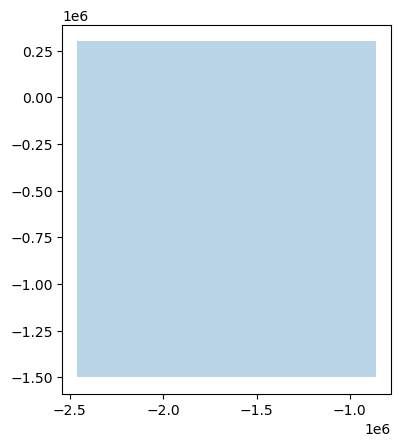

In [38]:
gpd.GeoSeries(bboxes[6]).plot(alpha = 0.3)

In [30]:
pathIn = f"~/data/polar/source/bedrock_topography_and_geothermal_heat_flux_antarctica_goce"
pathIn = os.path.expanduser(pathIn)

pathOut = f"~/data/polar/cubes/bedrock_topography_and_geothermal_heat_flux_antarctica_goce"
pathOut = os.path.expanduser(pathOut)

if not os.path.exists(pathOut):
    os.makedirs(pathOut)
    
filepath = os.path.join(pathIn,f'SMOS_IceThickness_2015_300.nc')

In [31]:
da = xr.open_dataset(filepath)
da = da.where(lambda x: x>0,other=np.nan)
da = da.sel(lat=slice(-90,-60))
da = da[["mrg"]].rio.write_crs(4326)
da = da.rename(dict(lon="x",lat="y"))
da = da.rio.reproject("EPSG:3031",nodata=np.nan)
da = da.chunk(dict(x=2048,y=2048))

da.to_zarr(f"{pathOut}/ice_thickness.zarr")

<xarray.Dataset>
Dimensions:      (x: 3476, y: 3476)
Coordinates:
  * x            (x) float64 -3.337e+06 -3.335e+06 ... 3.336e+06 3.338e+06
  * y            (y) float64 3.337e+06 3.335e+06 ... -3.336e+06 -3.338e+06
    spatial_ref  int64 0
Data variables:
    mrg          (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [12]:
ice = ice.to_dataset()

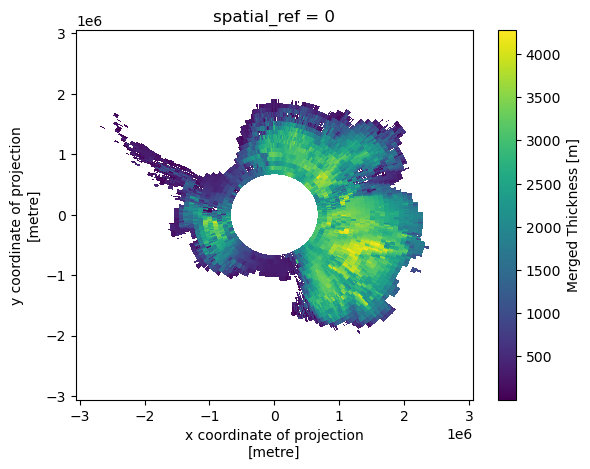

In [20]:
ice_polar.mrg.plot()

In [2]:
import xarray as xr
import numpy as np
import rioxarray
import geopandas as gpd
import os
from glob import glob

def regrid(filepath):
    
    da = xr.open_dataset(filepath)
    
#     x = np.arange(da.x_range[0],da.x_range[1],da.spacing[0].values)
#     y = np.arange(da.y_range[0],da.y_range[1],da.spacing[1].values)
#     z = np.reshape(da.z.values,(da.dimension[1].values,da.dimension[0].values))
    
#     da = xr.DataArray(
#         data=z,
#         dims=["y", "x"],
#         coords=dict(
#             y=("y", y),
#             x=("x", x),
#         ),
#     )
    
    return da

size = 300

pathIn = f"~/data/polar/source/geothermal_heat_flow_uncertainty_{size}x{size}km_xyz_data"
pathIn = os.path.expanduser(pathIn)

pathOut = f"~/data/polar/cubes/geothermal_heat_flow_uncertainty_{size}x{size}km_xyz_data"
pathOut = os.path.expanduser(pathOut)

if not os.path.exists(pathOut):
    os.makedirs(pathOut)
    
filepath = os.path.join(pathIn,f'{size}km_GHF_uncertainty.nc')

da = regrid(filepath)

# da.name = f"geothermal_heat_flow_uncertainty_{size}km"

# da = da.to_dataset()
# da = da.chunk(dict(x=2048,y=2048))

# da = da.where(lambda x: x>=0,other=np.nan)

# da.to_zarr(f"{pathOut}/curie_depth_{size}km.zarr")

In [3]:
da

<xarray.Dataset>
Dimensions:    (side: 2, xysize: 11526801)
Dimensions without coordinates: side, xysize
Data variables:
    x_range    (side) float64 ...
    y_range    (side) float64 ...
    z_range    (side) float64 ...
    spacing    (side) float64 ...
    dimension  (side) int32 ...
    z          (xysize) float32 ...
Attributes:
    title:    
    source:

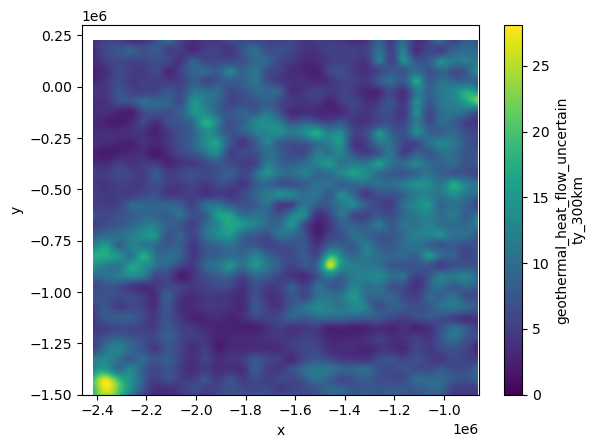

In [38]:
da.geothermal_heat_flow_uncertainty_300km.plot()

In [21]:
da.chunk(dict(x=2048,y=2048))

<xarray.Dataset>
Dimensions:                     (y: 3601, x: 3201)
Coordinates:
  * y                           (y) float64 -1.5e+06 -1.5e+06 ... 2.998e+05
  * x                           (x) float64 -2.46e+06 -2.46e+06 ... -8.602e+05
Data variables:
    geothermal_heat_flow_300km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [17]:
da.chunk(dict(x=2048,y=2048))

<xarray.Dataset>
Dimensions:                     (y: 18700, x: 16700)
Coordinates:
  * y                           (y) float64 -1.485e+06 -1.485e+06 ... 3.849e+05
  * x                           (x) float64 -2.475e+06 -2.475e+06 ... -8.051e+05
Data variables:
    geothermal_heat_flow_200km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [9]:
da.geothermal_heat_flow_300km.min()

<xarray.DataArray 'geothermal_heat_flow_300km' ()>
array(-3.40282347e+38)